In [1]:
# Data Handling & Manipulation
import pandas as pd                                         # for dataframes, CSV/Excel reading, tabular data manipulation
import numpy as np                                          # for numerical operations and array handling
import datetime                                             # for date and time manipulation
from datetime import datetime, timedelta                    # for date arithmetic (e.g., adding days)


# Data Visualisation (Static)
import matplotlib.pyplot as plt                             # for creating static plots
from matplotlib.ticker import FuncFormatter                 # for customising tick labels (e.g., currency, %)
import seaborn as sns                                       # for statistical visualisation (heatmaps, distplots, etc.)

# Data Visualisation (Interactive)
import plotly.express as px                                 # for quick and interactive visualisation
import plotly.graph_objects as go                           # for custom interactive plots
from plotly.subplots import make_subplots                   # for interactive subplots

# Data Quality & Missing Value Visualisation
import missingno as msno                                    # for visualising missing data patterns

# Statistical Testing & Inference
from statsmodels.stats.proportion import proportions_ztest  # for comparing proportions (e.g., late vs. on-time)
from scipy.stats import (
    normaltest,                                             # for checking normality
    chi2_contingency,                                       # for categorical association
    mannwhitneyu,                                           # for non-parametric testing
    ttest_ind,                                              # for independent sample t-test
    f_oneway,                                               # for one-way ANOVA
    kruskal,                                                # for Kruskal-Wallis test
    kstest,                                                 # for Kolmogorov-Smirnov test
    spearmanr,                                              # for Spearman correlation
    pointbiserialr                                          # for point-biserial correlation (binary vs. continuous)
)
import statsmodels.api as sm                                # for advanced statistical modelling and diagnostics
import statsmodels.formula.api as smf                       # for formula-based statistical models
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # for post-hoc tests after ANOVA

# System & Settings
import os                                                   # for file handling and directory operations
import warnings                                             # to suppress or manage warning messages
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)                 # display full content in cells (useful for text data)

# Machine Learning & Model Evaluation
import joblib                                               # for saving and loading ML models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    average_precision_score, precision_recall_fscore_support,
    confusion_matrix, PrecisionRecallDisplay, make_scorer, roc_auc_score,
    classification_report, roc_curve, auc, fbeta_score
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier           # for KNN classifier (added since it's in your benchmark)
from sklearn.tree import DecisionTreeClassifier              # for Decision Tree classifier (added since it's in your benchmark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBClassifier                           # for XGBoost classifier
from lightgbm import LGBMClassifier                         # for LightGBM classifier
from catboost import CatBoostClassifier, Pool               # for CatBoost classifier

In [2]:
# List of date columns for each Olist dataset:
# This dictionary maps each dataset filename to a list of columns that should be parsed as dates.
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'master_olist_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date',
        'review_creation_date',
        'review_answer_timestamp',
    ],
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv':
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list:
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any):
    return pd.read_csv(path, parse_dates=parse_dates)

In [4]:
df = read_olist_csv('../data/cleaned_data/master_olist_dataset.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_types,max_installments,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,has_review,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,"credit_card, voucher",1.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,True,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,True,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,True,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,credit_card,1.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data prevista.,2017-12-03,2017-12-05 19:21:58,True,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,credit_card,1.0,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51,True,stationery


Average total item price per order: $137.09


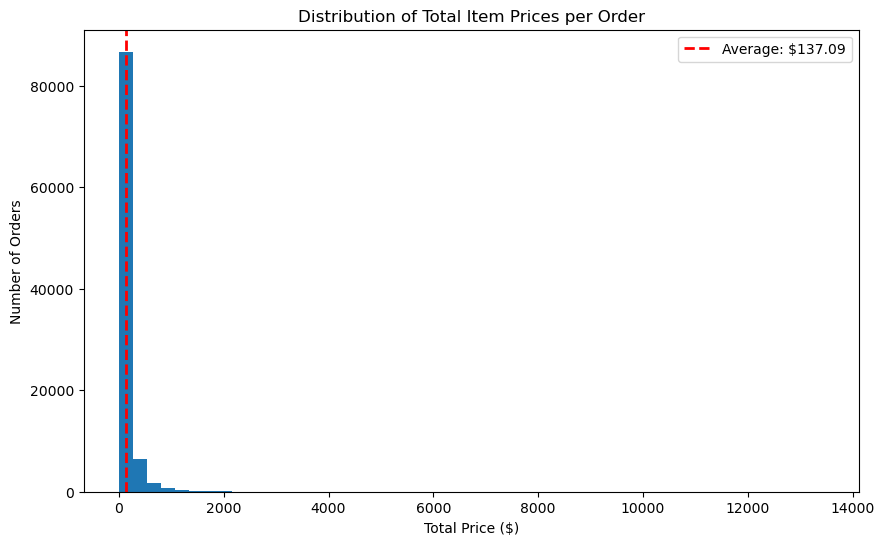

In [5]:
# Group by order_id and calculate sum of prices for each order
order_total_prices = df.groupby('order_id')['price'].sum()

# Calculate the average total price per order
average_order_total = order_total_prices.mean()

# Display the result
print(f"Average total item price per order: ${average_order_total:.2f}")

# Create a histogram to visualize the distribution of total prices per order
plt.figure(figsize=(10, 6))
order_total_prices.hist(bins=50)
plt.title('Distribution of Total Item Prices per Order')
plt.xlabel('Total Price ($)')
plt.ylabel('Number of Orders')
plt.axvline(average_order_total, color='red', linestyle='dashed', linewidth=2, label=f'Average: ${average_order_total:.2f}')
plt.legend()
plt.grid(False)
plt.show()

Average total freight value per order: $22.78


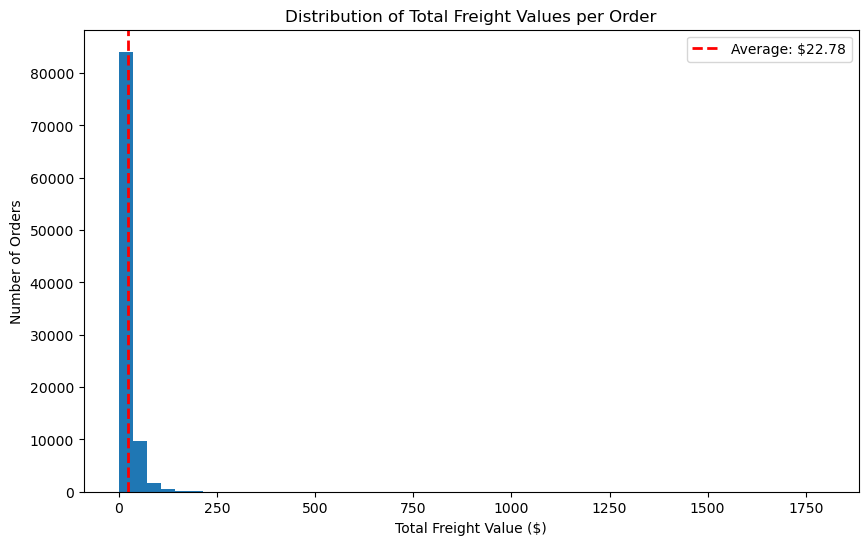

Average price to freight ratio: inf


In [6]:
# Group by order_id and calculate sum of freight values for each order
order_total_freight = df.groupby('order_id')['freight_value'].sum()

# Calculate the average total freight value per order
average_order_freight = order_total_freight.mean()

# Display the result
print(f"Average total freight value per order: ${average_order_freight:.2f}")

# Create a histogram to visualize the distribution of total freight values per order
plt.figure(figsize=(10, 6))
order_total_freight.hist(bins=50)
plt.title('Distribution of Total Freight Values per Order')
plt.xlabel('Total Freight Value ($)')
plt.ylabel('Number of Orders')
plt.axvline(average_order_freight, color='red', linestyle='dashed', linewidth=2, label=f'Average: ${average_order_freight:.2f}')
plt.legend()
plt.grid(False)
plt.show()

# Compare the price vs freight ratio
price_to_freight_ratio = order_total_prices / order_total_freight
average_ratio = price_to_freight_ratio.mean()

print(f"Average price to freight ratio: {average_ratio:.2f}")

Annual Order Statistics:


,Total Orders,First Order Date,Last Order Date,Days with Data,Avg Orders Per Day
order_year,,,,,
2016,262,2016-10-03 09:44:50,2016-12-23 23:16:47,82,3.195122
2017,43392,2017-01-05 11:56:06,2017-12-31 23:29:31,361,120.199446
2018,52612,2018-01-01 02:48:41,2018-08-29 15:00:37,241,218.307054


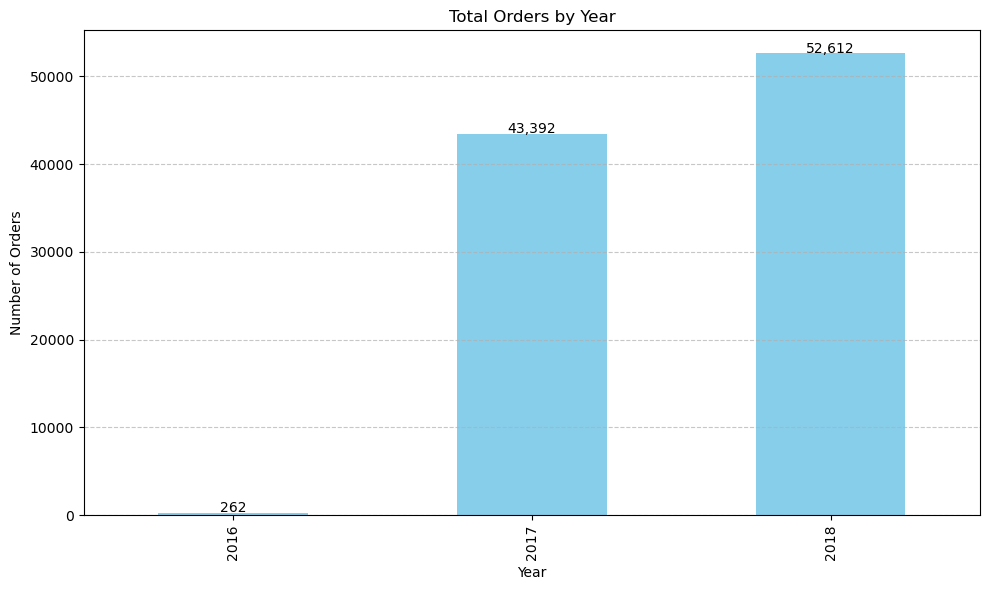

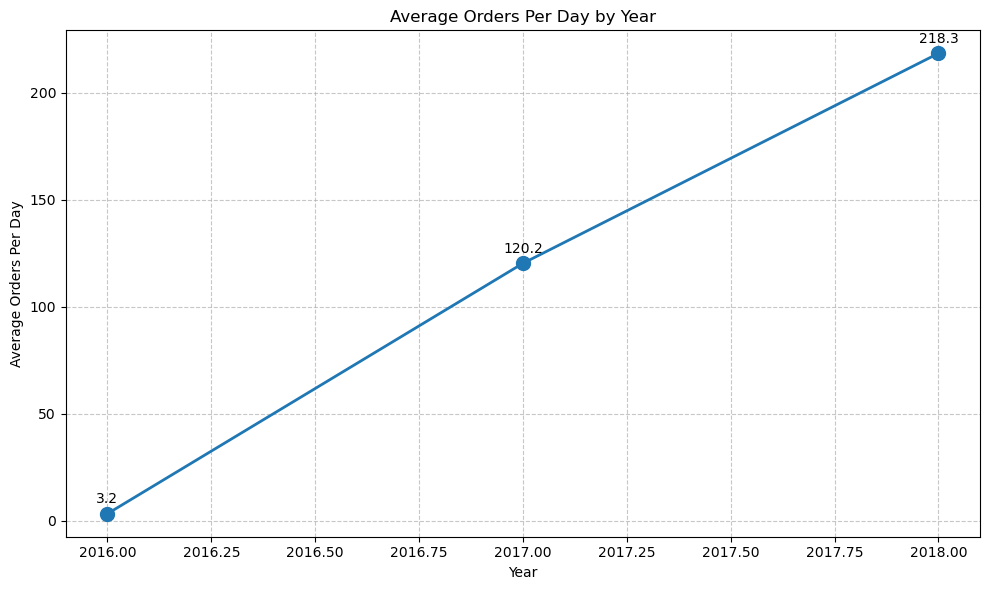

In [8]:
# Calculate the average number of orders delivered per year
# First convert the timestamp to datetime if it's not already
if isinstance(df['order_purchase_timestamp'].iloc[0], str):
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract year from the timestamp
df['order_year'] = df['order_purchase_timestamp'].dt.year

# Group by year and count unique orders
yearly_orders = df.groupby('order_year')['order_id'].nunique()

# Find the first and last order dates for each year
first_order_dates = df.groupby('order_year')['order_purchase_timestamp'].min()
last_order_dates = df.groupby('order_year')['order_purchase_timestamp'].max()

# Calculate the actual number of days for each year based on data
days_in_year_actual = (last_order_dates - first_order_dates).dt.days + 1

# Calculate average number of orders per day for each year using actual days
yearly_avg_per_day = yearly_orders / days_in_year_actual

# Create a DataFrame for better visualization
yearly_stats = pd.DataFrame({
    'Total Orders': yearly_orders,
    'First Order Date': first_order_dates,
    'Last Order Date': last_order_dates,
    'Days with Data': days_in_year_actual,
    'Avg Orders Per Day': yearly_avg_per_day
})

# Display the results
print("Annual Order Statistics:")
display(yearly_stats)

# Create a bar chart to visualize the yearly orders
plt.figure(figsize=(10, 6))
yearly_orders.plot(kind='bar', color='skyblue')
plt.title('Total Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(yearly_orders):
    plt.text(i, v + 100, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()

# Create a line chart for average orders per day
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_per_day.index, yearly_avg_per_day.values, 
         marker='o', linestyle='-', linewidth=2, markersize=10)
plt.title('Average Orders Per Day by Year')
plt.xlabel('Year')
plt.ylabel('Average Orders Per Day')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels for each point
for year, avg in yearly_avg_per_day.items():
    plt.text(year, avg + 5, f"{avg:.1f}", ha='center')

plt.tight_layout()
plt.show()